# INFO 370 Problem Set 2: Data manipulations
*Name:* Israel Martinez

## 1 Setup
In this problem set you will work with gapminder data. The data is complied from https://www.gapminder.org/data/ but you use the ready-made file on canvas. There is an accompanying documentation file that you should consult for the meaning of the variables.
1. (2pt) Load the data

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
gm = pd.read_csv("./data/gapminder.csv.bz2",
                sep = "\t")

2. (8pt) Do basic sanity checks:

    (a) How many variables (columns) is there in the data? Ensure you know the variables in the data. Keep the documentation nearby.
    
    (b) How many rows of data is there?
    
    (c) print the first few lines of data. Does it look reasonable?

In [3]:
list(gm.columns)

['iso3',
 'name',
 'iso2',
 'region',
 'sub-region',
 'intermediate-region',
 'time',
 'totalPopulation',
 'fertilityRate',
 'lifeExpectancy',
 'childMortality',
 'youthFemaleLiteracy',
 'youthMaleLiteracy',
 'adultLiteracy',
 'co2_PC',
 'GDP_PC',
 'agricultureTractors',
 'battleDeaths']

(a) There are 18 variables in the data. However, on the data's website documentation, it only shows 13 in the "Data combined by Gapminder" section and they don't all correlate with the ones shown in this dataset. I'm not exactly sure how to compare these right now or later in the assignment.

In [4]:
gm.shape

(13055, 18)

(b) This shows that there are 13,055 rows of data.

In [5]:
gm.head(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,childMortality,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,co2_PC,GDP_PC,agricultureTractors,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,NaN,NaN,NaN,NaN,204.62037,NaN,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,NaN,NaN,NaN,NaN,208.82281,NaN,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,NaN,NaN,NaN,NaN,226.11808,NaN,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,NaN,NaN,NaN,NaN,214.80037,NaN,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,NaN,NaN,NaN,NaN,207.61578,NaN,NaN,NaN


(c) These few lines in the dataset seem reasonable to me. However, just looking at the head, it shows there are a lot of NaN values in some variables.

## 2 Wealth
First, let’s do some data exploration. Answer the following questions: show the code, the computation results, and comment the results in the accompanying text.
1. (2pt) How many different countries are there in the data?

In [6]:
gm.groupby('name').sum()

,time,totalPopulation,fertilityRate,lifeExpectancy,childMortality,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,co2_PC,GDP_PC,agricultureTractors,battleDeaths
name,,,,,,,,,,,,
Afghanistan,119370.0,1.101735e+09,419.192,2951.830,10837.2,99.51077,181.75989,92.62625,8.43882,8.709031e+03,11755.0,243129.0
Albania,119370.0,1.624978e+08,195.654,4300.816,1434.8,496.12583,495.06292,486.88504,94.14608,1.127696e+05,390941.0,6.0
Algeria,119370.0,1.518317e+09,301.001,3813.774,6432.9,426.47580,468.01023,348.69695,142.98155,2.119363e+05,3206697.0,18817.0
American Samoa,119370.0,2.586906e+06,0.000,0.000,0.0,97.44365,97.88862,97.34416,0.00000,1.712081e+05,490.0,0.0
Andorra,119370.0,3.092841e+06,6.130,0.000,279.0,0.00000,0.00000,0.00000,184.26482,2.004155e+06,2130.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.0,0.000000e+00,0.000,0.000,0.0,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.0,0.0
Yemen,119370.0,8.244825e+08,427.621,3152.224,9835.0,95.97773,175.65422,91.19000,25.57994,3.208979e+04,157450.0,25937.0
Zambia,119370.0,5.168983e+08,383.796,3065.558,8773.6,434.67735,471.67375,433.03201,25.37003,7.913176e+04,99632.0,0.0


According to the number of rows, there are 249 different countries in the data.

2. (3pt) What is the earliest and the most recent year in the dataset?

In [7]:
gm['time']

0        1960.0
1        1961.0
2        1962.0
3        1963.0
4        1964.0
          ...  
13050    2015.0
13051    2016.0
13052    2017.0
13053    2018.0
13054    2019.0
Name: time, Length: 13055, dtype: float64

The earliest year is 1960 and the most recent year is 2019.

Now let’s define wealth as GDP per capita and let’s explore countries by average wealth.

3. (3pt) For which year do we have the most recent GDP data?

Hint: You can remove all missing GDP data to answer this question

In [52]:
gdp = gm.drop(['iso3',
 'iso2',
 'sub-region',
 'intermediate-region',
 'fertilityRate',
 'lifeExpectancy',
 'childMortality',
 'youthFemaleLiteracy',
 'youthMaleLiteracy',
 'adultLiteracy',
 'co2_PC',
 'agricultureTractors',
 'battleDeaths'], axis=1)
gdpNoNa = gdp[~gdp.GDP_PC.isna() & (gdp.GDP_PC > 0)]
gdpNoNa = gdpNoNa.sort_values('time', ascending=False)
gdpNoNa

,name,region,time,totalPopulation,GDP_PC
13054,Zimbabwe,Africa,2019.0,1.464547e+07,1183.09882
1204,Bahrain,Asia,2019.0,1.641172e+06,20912.98688
5357,India,Asia,2019.0,1.366418e+09,2151.72604
4454,Gambia,Africa,2019.0,2.347706e+06,815.21555
723,Austria,Europe,2019.0,8.879920e+06,50536.66415
...,...,...,...,...,...
1025,Bangladesh,Asia,1960.0,4.801350e+07,372.03175
11911,Turkey,Asia,1960.0,2.747234e+07,3174.84140
10286,Singapore,Asia,1960.0,1.646400e+06,3503.41112
844,Belgium,Europe,1960.0,9.153489e+06,13021.65232


The year which we have the most recent GDP data is 2019.

4. (3pt) What is the average wealth on this planet as of 2019? Let’s just compute average GDP across all countries for 2019 and ignore the fact that countries are of different size.

In [336]:
gdp2019 = gdpNoNa[(gdpNoNa.time == 2019.0)]
gdp2019.GDP_PC.mean()

15055.352217243242

The average GDP across all counties for 2019 was 15,055.35

5. (4pt) But not all countries may have this final year. Which 5 countries countries have most recent years missing? Till which year do they have data?

Hint: you may group by country and find max value for the year. In the resulting series, find the
min/max. Check out the nlargest method.

In [54]:
# .fare.apply(lambda x: pd.Series(x.unique()).nlargest(5))
# titanic.groupby("pclass").fare.nlargest(2)
ctryMaxYear = gdp.groupby(['name', 'time'])['GDP_PC'].max()
ctryMaxYear = pd.DataFrame(ctryMaxYear)
print(ctryMaxYear)
s = ctryMaxYear.groupby(level=1).idxmin()
s
# ctryMaxYear.reset_index(inplace=True)
# ctryMaxYear[ctryMaxYear.name == 'Afghanistan']
#.GDP_PC.nlargest()

                        GDP_PC
name        time              
Afghanistan 1960.0         NaN
            1961.0         NaN
            1962.0         NaN
            1963.0         NaN
            1964.0         NaN
...                        ...
Zimbabwe    2015.0  1234.10335
            2016.0  1224.30992
            2017.0  1263.32132
            2018.0  1305.78329
            2019.0  1183.09882

[12779 rows x 1 columns]


,GDP_PC
time,
1960.0,"(Myanmar, 1960.0)"
1961.0,"(China, 1961.0)"
1962.0,"(China, 1962.0)"
1963.0,"(China, 1963.0)"
1964.0,"(Myanmar, 1964.0)"
1965.0,"(Myanmar, 1965.0)"
1966.0,"(Myanmar, 1966.0)"
1967.0,"(Myanmar, 1967.0)"
1968.0,"(Myanmar, 1968.0)"


Took too long for me to figure out how to answer this question. Moving on.

6. (4pt) Now let’s compare the continents. We’ll do it easy again and just compute the average wealth (i.e. GDP) for each continent in 2019, and we use region as continent. We disregard the fact that countries are of different size. Print the continents, and the corresponding GDP in a decreasing order. 

Remember to use only the most recent data!

Hint: check out methods groupby and sort_values.

In [55]:
gdp2019 = gdpNoNa[(gdpNoNa.time == 2019.0)]
gdpRegion = gdp2019.groupby('region').mean()
gdpRegion.sort_values('GDP_PC', ascending=False)

,time,totalPopulation,GDP_PC
region,,,
Europe,2019.0,1.860645e+07,33227.983766
Americas,2019.0,2.776846e+07,14516.826303
Asia,2019.0,9.561124e+07,14116.124163
Oceania,2019.0,3.453520e+06,11817.735554
Africa,2019.0,2.550682e+07,2765.708956


7. (6pt) But this was just about the average numbers. Now for each continent let’s also find the richest and poorest country, the corresponding GDP, and population (for 2019). Print these in a readable form.

Note: While this gives a hint about inequality, we still completely ignore the intra-county inequality. Quite likely the rich in the poor countries earn more than the poor in the rich countries. But these measures unfortunately do not let us to assess this

Hint: while you can extract the values using construct like data.gdp == data.gdp.min(), you
may also check out methods idxmin and idxmax. If this seems overwhelming, then just loop over
continents, and for each continent find the richest and poorest country as of 2019 (check out methods
nlargest and nsmallest).

In [97]:
regionsMax = {}
regionsMin = {}
for (row, value) in gdp2019.iterrows():
    region = value['region']
    name = value['name']
    GDP_PC = value['GDP_PC']
    totalPop = value['totalPopulation']
    if region not in regionsMax:
        regionsMax[region] = {'name': name, 'GDP_PC': GDP_PC, 'totalPop': totalPop}
    else:
        if GDP_PC > regionsMax[region]['GDP_PC']:
            regionsMax[region] = {'name': name, 'GDP_PC': GDP_PC, 'totalPop': totalPop}

for (row, value) in gdp2019.iterrows():
    region = value['region']
    name = value['name']
    GDP_PC = value['GDP_PC']
    totalPop = value['totalPopulation']
    if region not in regionsMin:
        regionsMin[region] = {'name': name, 'GDP_PC': GDP_PC, 'totalPop': totalPop}
    else:
        if GDP_PC < regionsMin[region]['GDP_PC']:
            regionsMin[region] = {'name': name, 'GDP_PC': GDP_PC, 'totalPop': totalPop}


for key in regionsMax:
    print('In', key, 'the richest country is', regionsMax[key]['name'], 'with GDP_PC of', round(regionsMax[key]['GDP_PC'],2), 'and a population of', round(regionsMax[key]['totalPop']))
    print('Also in', key, 'the poorest country is', regionsMin[key]['name'], 'with GDP_PC of', round(regionsMin[key]['GDP_PC'],2), 'and a population of', round(regionsMin[key]['totalPop']))

In Africa the richest country is Seychelles with GDP_PC of 15048.75 and a population of 97625
Also in Africa the poorest country is Burundi with GDP_PC of 208.07 and a population of 11530580
In Asia the richest country is Qatar with GDP_PC of 63281.67 and a population of 2832067
Also in Asia the poorest country is Afghanistan with GDP_PC of 573.29 and a population of 38041754
In Europe the richest country is Luxembourg with GDP_PC of 111043.53 and a population of 620001
Also in Europe the poorest country is Ukraine with GDP_PC of 3224.94 and a population of 44386203
In Oceania the richest country is Australia with GDP_PC of 57183.38 and a population of 25365745
Also in Oceania the poorest country is Solomon Islands with GDP_PC of 1749.43 and a population of 669823
In Americas the richest country is Bermuda with GDP_PC of 94106.36 and a population of 64027
Also in Americas the poorest country is Haiti with GDP_PC of 1245.01 and a population of 11263077
In nan the richest country is nan 

8. (4pt) Comment the list of poorest and richest countries. What do you think about these lists. Did you know that Bermuda is the richest country in Americas? Do you know why? Why do most of the rich countries have small population?

I printed the list up above. I did not know that the Bermuda is the richest country in Americas. I'm not sure why it would be the richest country. I'm guessing the the richest countries have small population because rich people might choose more secluded places.

## 3 Health (30pt)
Health is a complex concept, but fortunately we can proxy health with life expectancy (LE). It is a natural index of health that has been measured rather well for a long time already.
1. (3pt) For how many countries we do not have LE for 1960 and 2019?

In [218]:
le = gm.drop(['iso3',
 'iso2',
 'sub-region',
 'intermediate-region',
 'fertilityRate',
 'childMortality',
 'youthFemaleLiteracy',
 'youthMaleLiteracy',
 'adultLiteracy',
 'co2_PC',
 'GDP_PC',
 'agricultureTractors',
 'battleDeaths'], axis=1)
leRecent = le[(le['time'] == 1960.0) | (le['time'] == 2019.0)]
leRecent.shape[0] - leRecent['lifeExpectancy'].dropna().shape[0]

46

There are about 23-46 countries missing. I couldn't figure out how to separate countries who have both 1960 and 2019 with countries who only have one year listed (like Antarctica).

2. (4pt) What is the lowest and highest LE in data? Which years/countries does this correspond?

In [219]:
le = le[le['lifeExpectancy'].notna()]
low = {'lifeExpec': 1000};
high = {'lifeExpec': 0};
maxYears = 1000
for row, value in le.iterrows():
    lifeExpec = value['lifeExpectancy']
    time = value['time']
    country = value['name']
    if lifeExpec > high['lifeExpec']:
        high['lifeExpec'] = lifeExpec
        high['time'] = time
        high['country'] = country
    elif lifeExpec < low['lifeExpec']:
        low['lifeExpec'] = lifeExpec
        low['time'] = time
        low['country'] = country
print(low)
print(high)

{'lifeExpec': 18.907, 'time': 1977.0, 'country': 'Cambodia'}
{'lifeExpec': 85.41707, 'time': 2012.0, 'country': 'San Marino'}


The lowest life expectancy in the data is 18.9 years, and it corresponds to Cambodia in the year 1977.

The highest life expectancy in the data is 85.4 years, and it corresponds to San Marino in the year 2012.

3. (4pt) If you did this correctly, you notice that the shortest LE is less than 20 years. What historical events does it correspond to? (You may consult e.g. Wikipedia).

From 1975 to 1979, there was a Cambodian genocide which "was the systematic persecution and killing of Cambodians by the Khmer Rouge under the leadership of Communist Party general secretary Pol Pot, who radically pushed Cambodia towards communism." It resulted in 1.5 to 2 million deaths.

4. (5pt) Find the country with longest and shortest LE for each continent.

In [220]:
lowContinents = {}
highContinents = {}
for row, value in le.iterrows():
    lifeExpec = value['lifeExpectancy']
    country = value['name']
    region = value['region']
    if region not in lowContinents:
        lowContinents[region] = {'country': country, 'lifeExpec': lifeExpec}
    elif region not in highContinents:
        highContinents[region] = {'country': country, 'lifeExpec': lifeExpec}
    else:
        if lifeExpec < lowContinents[region]['lifeExpec']:
            lowContinents[region] = {'country': country, 'lifeExpec': lifeExpec}
        elif lifeExpec > highContinents[region]['lifeExpec']:
            highContinents[region] = {'country': country, 'lifeExpec': lifeExpec}
print(lowContinents)
print(highContinents)

{'Americas': {'country': 'Haiti', 'lifeExpec': 41.762}, 'Asia': {'country': 'Cambodia', 'lifeExpec': 18.907}, 'Africa': {'country': 'Rwanda', 'lifeExpec': 26.172}, 'Europe': {'country': 'Bosnia and Herzegovina', 'lifeExpec': 60.353}, 'Oceania': {'country': 'Papua New Guinea', 'lifeExpec': 38.935}, nan: {'country': nan, 'lifeExpec': 65.79756}}
{'Americas': {'country': 'Cayman Islands', 'lifeExpec': 82.19024}, 'Asia': {'country': 'Hong Kong', 'lifeExpec': 85.07805}, 'Africa': {'country': 'Algeria', 'lifeExpec': 76.88}, 'Europe': {'country': 'San Marino', 'lifeExpec': 85.41707}, 'Oceania': {'country': 'Australia', 'lifeExpec': 82.9}, nan: {'country': nan, 'lifeExpec': 83.086}}


I printed the countries with the longest and shortest life expectancies for each continent above.

5. (6pt)Which countries had the fastest and slowest growth rate of LE? You can compute the growth rate (pct per year) as

g = 100 * (LE1 / LE0) ^ (1 / n) - 1

where LE0 is the life expectancy at the beginning of the period, LE1 is it at the end of the period, and n is the length of the period in years.

Hint: for each country, compute the first valid year of life expectancy, last valid year of life expectancy, and find their life expectancies for the corresponding years. If the result is a series, just
order it, if it is not a series, make it into a series and order it.

In [262]:
countries = {}
countryNames = []
growthRates = []
for row, value in le.iterrows():
    country = value['name']
    year = value['time']
    lifeExpec = value['lifeExpectancy']
    if country not in countries:
        if math.isnan(lifeExpec) == False:
            countries[country] = {'country': country, 'minYear': year, 'maxYear': year, 'firstLifeExpec': lifeExpec, 'growth': 0}
    if year > countries[country]['maxYear']:
        countries[country]['maxYear'] = year
        countries[country]['lastLifeExpec'] = lifeExpec
        LE1 = countries[country]['lastLifeExpec']
        LE0 = countries[country]['firstLifeExpec']
        n = countries[country]['maxYear'] - countries[country]['minYear']
        countries[country]['growth'] = 100 * (LE1 / LE0)*(1/n) - 1


for country in countries:
    countryNames.append(countries[country]['country'])
    growthRates.append(float(countries[country]['growth']))

growthSeries = pd.Series(growthRates,
               index = countryNames)
growthSeries = growthSeries.sort_values(ascending=False)
print(growthSeries)

Sint Maarten (Dutch part)    10.669884
Marshall Islands              5.956314
Palau                         5.672458
Saint Kitts and Nevis         4.577422
Dominica                      4.359215
                               ...    
Bulgaria                      0.833623
Latvia                        0.827333
Ukraine                       0.782460
Cayman Islands                0.000000
San Marino                    0.000000
Length: 205, dtype: float64


The country with the fastest growth rate was Sint Maarten (Dutch part) and the country with the slowest was Ukraine. However, Camayan Islands and San Marino showed no growth. Also, Sint Maarten only has years 2007 to 2016, which is why it would probably be the fastest.

6. (4pt) Do you see a pattern (or multiple patterns) here? Remember: you are looking at growth oflife expectancy over an extended period.

I see that the top 5 countries are islands, so their smaller population may be why the growth rate is so fast.

7. (4pt) Now pick the top and bottom countries in terms of life expectancy growth you identified above, and make a plot where you show how life expectancy has changed over time in these two countries. Example results provided below, but you need to come up with your own solution with a comparable result!

{'country': 'Sint Maarten (Dutch part)', 'minYear': 2007.0, 'maxYear': 2016.0, 'firstLifeExpec': 74.5439, 'growth': 10.669884010182814, 'lastLifeExpec': 78.29268}
{'country': 'Ukraine', 'minYear': 1960.0, 'maxYear': 2019.0, 'firstLifeExpec': 68.29954, 'growth': 0.7824603260722263, 'lastLifeExpec': 71.82732}


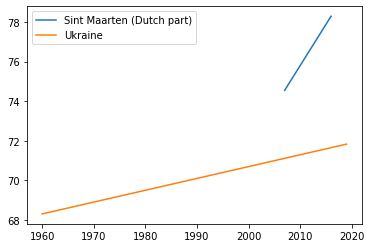

In [274]:
print(countries['Sint Maarten (Dutch part)'])
print(countries['Ukraine'])
fastestCountry = countries['Sint Maarten (Dutch part)']
slowestCountry = countries['Ukraine']
_ = plt.plot([fastestCountry['minYear'], fastestCountry['maxYear']], [fastestCountry['firstLifeExpec'], fastestCountry['lastLifeExpec']], label = fastestCountry['country'])
_ = plt.plot([slowestCountry['minYear'], slowestCountry['maxYear']], [slowestCountry['firstLifeExpec'], slowestCountry['lastLifeExpec']], label = slowestCountry['country'])
plt.legend()
plt.show()

## 4 Gender disparities (30pt)
Let’s see how has gender disparity changed over time. We use difference between male and female youth
literacy rate as a measure of gender disparity. Let’s define it as male − female, i.e. positive numbers
indicate disparity in favor of males.
1. (3pt) How many valid male/female youth literacy rate values do we have? How many are missing?

In [312]:
yl = gm.drop(['iso3',
 'iso2',
 'sub-region',
 'intermediate-region',
 'fertilityRate',
 'lifeExpectancy',
 'childMortality',
 'co2_PC',
 'GDP_PC',
 'agricultureTractors',
 'battleDeaths'], axis=1)
ylValid = yl[yl['youthFemaleLiteracy'].notna()]
ylValid = yl[yl['youthMaleLiteracy'].notna()]
print(yl.shape)
print(ylValid.shape)
ylValid

(13055, 7)
(921, 7)


,name,region,time,totalPopulation,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy
40,Aruba,Americas,2000.0,90853.0,99.16637,98.88176,97.29125
50,Aruba,Americas,2010.0,101669.0,99.32310,98.96573,96.82264
58,Aruba,Americas,2018.0,105845.0,99.39000,99.60000,97.80742
79,Afghanistan,Asia,1979.0,13411056.0,11.14280,45.79602,18.15768
111,Afghanistan,Asia,2011.0,30117413.0,32.11322,61.87907,31.44885
...,...,...,...,...,...,...,...
12993,Zambia,Africa,2018.0,17351822.0,91.62819,92.55964,86.74796
13017,Zimbabwe,Africa,1982.0,7958241.0,84.81224,93.82696,77.79417
13027,Zimbabwe,Africa,1992.0,10900502.0,94.35344,96.54062,83.51258
13046,Zimbabwe,Africa,2011.0,12894316.0,92.12456,89.59058,83.58271


There are 921 valid male/female youth literacy rates. There are 12,134 rows missing.

2. (5pt) How many missing cases do we have by year? How does the data quality change over years? Make plot to demonstrate this!

    Hint: you can get this done using .apply method, but if you feel this overwhelming use loops: create an empty list, loop over all years, and for each year filter the data and add the number of missings to the list

In [313]:
missing = []
for row, value in yl.iterrows():
    if pd.isnull(value['youthFemaleLiteracy']):
        missing.append(value)
    if pd.isnull(value['youthMaleLiteracy']):
        missing.append(value)
    if pd.isnull(value['adultLiteracy']):
        missing.append(value)
len(missing)

36386

There are 36,386 missing values.

3. (8pt) How has the world gender disparity developed through years? This time compute the weighted average where weights are the corresponding total population size (well, should use the corresponding gender/age group size but let’s stay simple).

    Hint: you can do it like this:
    (a) Select only cases where literacy data is not missing
    
    (b) For each year, compute the total world population (you can just add new variables to the data frame).
    
    (c) For each country-year (i.e. each observation), compute the country population times literacy for both males, females; and divide this by world population.
    
    (d) Now group the above by year and sum. This is the weighted average

(a) Select only cases where literacy data is not missing

In [314]:
yl = yl.dropna()
yl

,name,region,time,totalPopulation,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy
40,Aruba,Americas,2000.0,90853.0,99.16637,98.88176,97.29125
50,Aruba,Americas,2010.0,101669.0,99.32310,98.96573,96.82264
58,Aruba,Americas,2018.0,105845.0,99.39000,99.60000,97.80742
79,Afghanistan,Asia,1979.0,13411056.0,11.14280,45.79602,18.15768
111,Afghanistan,Asia,2011.0,30117413.0,32.11322,61.87907,31.44885
...,...,...,...,...,...,...,...
12993,Zambia,Africa,2018.0,17351822.0,91.62819,92.55964,86.74796
13017,Zimbabwe,Africa,1982.0,7958241.0,84.81224,93.82696,77.79417
13027,Zimbabwe,Africa,1992.0,10900502.0,94.35344,96.54062,83.51258
13046,Zimbabwe,Africa,2011.0,12894316.0,92.12456,89.59058,83.58271


(b) For each year, compute the total world population (you can just add new variables to the data frame).

In [315]:
years = {}
for row, value in yl.iterrows():
    year = value['time']
    totalPop = value['totalPopulation']
    if year not in years:
        years[year] = totalPop
    else:
        years[year] += totalPop
years = dict(sorted(years.items()))
yl['worldPop'] = yl['time'].map(years)
yl

,name,region,time,totalPopulation,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,worldPop
40,Aruba,Americas,2000.0,90853.0,99.16637,98.88176,97.29125,2.107204e+09
50,Aruba,Americas,2010.0,101669.0,99.32310,98.96573,96.82264,2.766603e+09
58,Aruba,Americas,2018.0,105845.0,99.39000,99.60000,97.80742,5.019461e+09
79,Afghanistan,Asia,1979.0,13411056.0,11.14280,45.79602,18.15768,7.736662e+07
111,Afghanistan,Asia,2011.0,30117413.0,32.11322,61.87907,31.44885,2.834605e+09
...,...,...,...,...,...,...,...,...
12993,Zambia,Africa,2018.0,17351822.0,91.62819,92.55964,86.74796,5.019461e+09
13017,Zimbabwe,Africa,1982.0,7958241.0,84.81224,93.82696,77.79417,1.067005e+09
13027,Zimbabwe,Africa,1992.0,10900502.0,94.35344,96.54062,83.51258,8.785197e+07
13046,Zimbabwe,Africa,2011.0,12894316.0,92.12456,89.59058,83.58271,2.834605e+09


(c) For each country-year (i.e. each observation), compute the country population times literacy for both males, females; and divide this by world population.

In [325]:
observations = []
for row, value in yl.iterrows():
    countryPop = value['totalPopulation']
    femaleLit = value['youthFemaleLiteracy']
    maleLit = value['youthFemaleLiteracy']
    observations.append((countryPop * (femaleLit + maleLit)) / worldPop)

yl['worldObs'] = pd.DataFrame({'worldObs': observations})
yl

,name,region,time,totalPopulation,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,worldPop,worldObs
40,Aruba,Americas,2000.0,90853.0,99.16637,98.88176,97.29125,2.107204e+09,1.092758
50,Aruba,Americas,2010.0,101669.0,99.32310,98.96573,96.82264,2.766603e+09,0.868167
58,Aruba,Americas,2018.0,105845.0,99.39000,99.60000,97.80742,5.019461e+09,0.048254
79,Afghanistan,Asia,1979.0,13411056.0,11.14280,45.79602,18.15768,7.736662e+07,18.432072
111,Afghanistan,Asia,2011.0,30117413.0,32.11322,61.87907,31.44885,2.834605e+09,21.775375
...,...,...,...,...,...,...,...,...,...
12993,Zambia,Africa,2018.0,17351822.0,91.62819,92.55964,86.74796,5.019461e+09,NaN
13017,Zimbabwe,Africa,1982.0,7958241.0,84.81224,93.82696,77.79417,1.067005e+09,NaN
13027,Zimbabwe,Africa,1992.0,10900502.0,94.35344,96.54062,83.51258,8.785197e+07,NaN
13046,Zimbabwe,Africa,2011.0,12894316.0,92.12456,89.59058,83.58271,2.834605e+09,NaN


(d) Now group the above by year and sum. This is the weighted average.

In [329]:
dispSeries = yl.groupby('time').worldObs.sum()
dispSeries

time
1970.0     0.000000
1972.0     0.000000
1975.0     0.011750
1976.0     0.000000
1977.0     0.000000
1978.0     0.000000
1979.0    18.558352
1980.0    14.661922
1981.0     0.000000
1982.0     0.000000
1983.0     0.000000
1984.0     0.000000
1985.0     1.014568
1986.0     0.000000
1987.0     0.000000
1988.0     0.000000
1989.0     0.313208
1990.0     1.087638
1991.0     2.147037
1992.0     0.000000
1993.0     0.000000
1994.0     0.000000
1995.0     0.000000
1996.0     0.000000
1997.0     0.000000
1998.0     0.000000
1999.0     0.066681
2000.0     6.699906
2001.0     7.949610
2002.0     0.000000
2003.0     0.000000
2004.0     0.000000
2005.0    29.919772
2006.0     0.079349
2007.0     0.129256
2008.0    10.301437
2009.0     0.179046
2010.0     1.144480
2011.0    24.142204
2012.0     2.073574
2013.0     0.951005
2014.0    11.773826
2015.0     3.961626
2016.0     0.479986
2017.0     6.905224
2018.0    25.955963
2019.0     0.000000
Name: worldObs, dtype: float64

4. (4pt) Make a plot that shows how has the disparity changed over time.

<AxesSubplot:xlabel='time'>

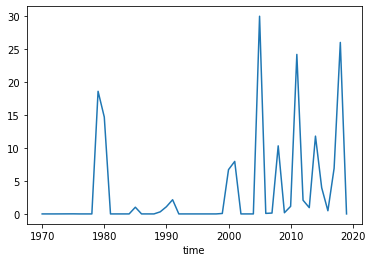

In [330]:
dispSeries.plot()

5. (4pt) If your result is like mine, you see that the disparity is volatile, and fluctuating b/w 0 and 25 pct pt, mostly in favor of males. However, the trend is clearly downward. Does this result indicate that gender disparity is an issue that the world in recent years has mostly overcome?

To be honest, I cannot tell whether this is an issue that the world in recent years has mostly overcome. I have no guess as to why there is a fluctuation.

6. (5pt) Find the countries with the disparity more than 5%, in favor of either boys or girls, as of 2018. What are these places? Do you know why some of those are in this list?

In [335]:
yl2018 = yl[(yl.time == 2018.0)]
yl2018 = yl2018.groupby('name').sum()
yl2018.sort_values('worldObs', ascending=False)

,time,totalPopulation,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,worldPop,worldObs
name,,,,,,,
Afghanistan,2018.0,3.717239e+07,56.25475,74.08480,43.01972,5.019461e+09,23.469882
Albania,2018.0,2.866376e+06,99.63000,99.05000,98.14115,5.019461e+09,1.963013
Argentina,2018.0,4.449450e+07,99.75765,99.24183,99.00387,5.019461e+09,0.474814
Aruba,2018.0,1.058450e+05,99.39000,99.60000,97.80742,5.019461e+09,0.048254
"Palestine, State of",2018.0,4.569087e+06,99.38239,99.29223,97.21861,5.019461e+09,0.000000
...,...,...,...,...,...,...,...
India,2018.0,1.352617e+09,90.16941,92.99297,74.37299,5.019461e+09,0.000000
Honduras,2018.0,9.587522e+06,98.18510,94.89199,87.20524,5.019461e+09,0.000000
Greece,2018.0,1.073288e+07,99.07000,99.26000,97.93595,5.019461e+09,0.000000


At this point I don't think that I did my coding right because it shows 0.00 for countries that I've heard have a reputation of having high disparity. But I did my best with the assignment.

## 5 How much time did you spend?
14 hours.....